In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import csv
from datetime import datetime as dt
import os
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#country_code= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [61]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #country= citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
   # If the city is unique, then add it to a our cities list, it has to be in the loop withing the indeneted sapce to check each city as being addeed to the list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count-621 countries were counted
len(cities) 

#country_code=[]
#counter =0
        #for city in cities
            #country_code= city.country_code

#City_df = pd.DataFrame(cities)
#city_df.head()
    

633

In [62]:
## set up additional columns to hold information
#City_df["City"] = ""
#City_df["Country"] = ""
#City_df.set_value(index, "City", city)
#City_df.set_value(index, "Country", country)

weather_key=api_keys.api_key
URL="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_key
#URL="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_key
citi_weather=[]

for city in cities:
    city_URL=URL+'&q='+city
    #print("processing record for the city %s.URL: %s" % (city, city_URL))
    print('processing record for the city %s'%city)
    #for date in city_data:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    #converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    #converted_timestamps.append(converted_time)
        
    try:

        city_data=req.get(city_URL).json()
        city_lat=city_data["coord"]["lat"]
        city_lon=city_data["coord"]["lon"]
        city_temp=city_data["main"]["temp"]
        city_hum=city_data["main"]["humidity"]
        city_pr=city_data["main"]["pressure"]
        city_ws=city_data["wind"]["speed"]
        city_cl=city_data["clouds"]["all"]
        city_cc=city_data["sys"]["country"]
        city_date=city_data["dt"]

        citi_weather.append({"city":city, 
        "latitude":city_lat,
        "longitude":city_lon,
        "temperature":city_temp,
        "humidity":city_hum,
        "pressure":city_pr,
        "wind speed":city_ws,
        "clouds":city_cl,
        "country code":city_cc,
        "Date":city_date
})
    except:
        print('city not found')
    pass


processing record for the city port alfred
processing record for the city ushuaia
processing record for the city samalaeulu
city not found
processing record for the city amderma
city not found
processing record for the city maniitsoq
processing record for the city mataura
processing record for the city champerico
processing record for the city tautira
processing record for the city banda aceh
processing record for the city santiago del estero
processing record for the city hays
processing record for the city katsuura
processing record for the city jamestown
processing record for the city bredasdorp
processing record for the city chokurdakh
processing record for the city roma
processing record for the city taoudenni
processing record for the city shenjiamen
processing record for the city jaciara
processing record for the city new norfolk
processing record for the city hamilton
processing record for the city vaini
processing record for the city maragheh
processing record for the city sin

processing record for the city petropavlovsk-kamchatskiy
processing record for the city qaanaaq
processing record for the city paamiut
processing record for the city goderich
processing record for the city pilar
processing record for the city port blair
processing record for the city pierre
processing record for the city te anau
processing record for the city cartagena
processing record for the city kemijarvi
city not found
processing record for the city leningradskiy
processing record for the city nome
processing record for the city codrington
processing record for the city verkhoyansk
processing record for the city saint george
processing record for the city altay
processing record for the city provideniya
processing record for the city meulaboh
processing record for the city tsihombe
city not found
processing record for the city nisia floresta
processing record for the city priyutnoye
processing record for the city tasiilaq
processing record for the city coihaique
processing record 

processing record for the city gondanglegi
processing record for the city duluth
processing record for the city cherskiy
processing record for the city lipin bor
processing record for the city lilongwe
processing record for the city pangnirtung
processing record for the city nara
processing record for the city dzaoudzi
processing record for the city palestina
processing record for the city nyurba
processing record for the city muhos
processing record for the city ardakan
processing record for the city dingle
processing record for the city mayo
processing record for the city kabare
processing record for the city villefontaine
processing record for the city beterou
processing record for the city zhuhai
processing record for the city palasa
city not found
processing record for the city belushya guba
city not found
processing record for the city ngunguru
processing record for the city svetlaya
processing record for the city castro-urdiales
processing record for the city kysyl-syr
processin

processing record for the city rochester
processing record for the city nishihara
processing record for the city mecca
processing record for the city kangalassy
processing record for the city dalbandin
processing record for the city soto la marina
processing record for the city bur gabo
city not found
processing record for the city sur
processing record for the city denpasar
processing record for the city rorvik
processing record for the city wuning
processing record for the city brae
processing record for the city muros
processing record for the city oyama
processing record for the city barawe
city not found
processing record for the city sorvag
city not found
processing record for the city teknaf
processing record for the city ucluelet
processing record for the city sao jose da coroa grande
processing record for the city alzamay
processing record for the city honningsvag
processing record for the city padang
processing record for the city iskilip
processing record for the city cozume

In [22]:
#json.dumps(date.date.now().isoformat())

NameError: name 'date' is not defined

In [63]:
#create csv file"cities" in a folder named output_file
#convert to dataframe first and save as csv file
city_data_df=pd.DataFrame(citi_weather)
latitude= city_data_df["latitude"]
longitude=city_data_df["longitude"]
temperature=city_data_df["temperature"]
humidity=city_data_df["humidity"]
pressure=city_data_df["pressure"]
wind_speed=city_data_df["wind speed"]
clouds=city_data_df["clouds"]
country=city_data_df["country code"]
date=city_data_df['Date'] 

city_data_df.head()        


#city_data_df.to_csv("output_data/cities.csv")



,Date,city,clouds,country code,humidity,latitude,longitude,pressure,temperature,wind speed
0,1533646458,port alfred,36,ZA,84,-33.59,26.89,1023.30,58.60,27.56
1,1533646381,ushuaia,12,AR,100,-54.81,-68.31,981.72,20.25,2.39
2,1533646458,maniitsoq,92,GL,89,65.42,-52.90,1009.69,49.51,11.45
3,1533646459,mataura,88,NZ,82,-46.19,168.86,999.72,38.16,2.95
4,1533646459,champerico,24,MX,96,16.38,-93.60,943.87,65.70,2.39


In [64]:
city_data_df.dtypes

Date              int64
city             object
clouds            int64
country code     object
humidity          int64
latitude        float64
longitude       float64
pressure        float64
temperature     float64
wind speed      float64
dtype: object

In [65]:
city_data_df.count()

Date            559
city            559
clouds          559
country code    559
humidity        559
latitude        559
longitude       559
pressure        559
temperature     559
wind speed      559
dtype: int64

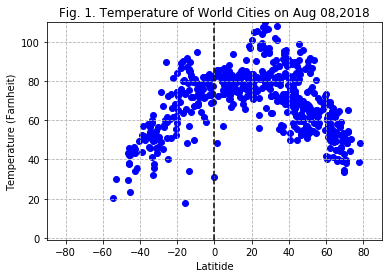

In [116]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["temperature"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Fig. 1. Temperature of World Cities on Aug 08,2018")
plt.ylabel("Temperature (Farnheit)")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("temperatureofWorldCities.png")

# Show plot
plt.show()

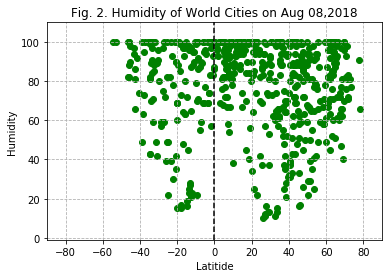

In [115]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["humidity"], marker="o", color="green")

# Incorporate the other graph properties
plt.title("Fig. 2. Humidity of World Cities on Aug 08,2018")
plt.ylabel("Humidity")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("HumidityofWorldCities.png")

# Show plot
plt.show()

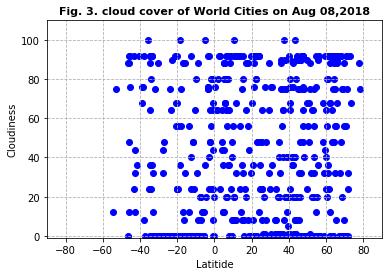

In [99]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["clouds"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Fig. 3. cloud cover of World Cities on Aug 08,2018", fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("Cloudiness")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)

# Save the figure
plt.savefig("CloudCoverofWorldCities.png")

# Show plot
plt.show()

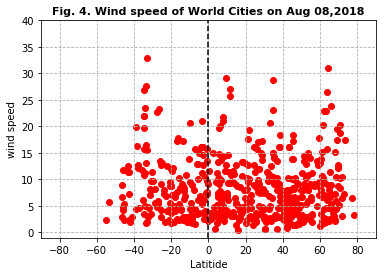

In [114]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["wind speed"], marker="o", color="red")

# Incorporate the other graph properties
plt.title("Fig. 4. Wind speed of World Cities on Aug 08,2018",fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("wind speed")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,40)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("windspeedofWorldCities.png")

# Show plot
plt.show()

In [120]:
file = open(“testfile.txt”,”w”) 
 
file.write(“Hello World”) 
file.write(“This is our new text file”) 
file.write(“and this is another line.”) 
file.write(“Why? Because we can.”) 
 
file.close() 

SyntaxError: invalid character in identifier (<ipython-input-120-0905bdd47b13>, line 1)

In [119]:
# display results in .txt file
output_file = os.path.join("output_data", "WeatherPy_Results.txt")
with open(output_file, "w") as datafile:
    datafile.write("WeatherPy_Results\n")
    datafile.write(f"Total Months: {Number_of_months}\n")
    datafile.write(f"Total: ${sum_Revenue}\n")
    datafile.write(f"Average Change: ${average_change}\n")
    datafile.write(f"Greatest Increase in Profits: {Max_Revenue_month} (${Max_Revenue})\n")
    datafile.write(f"Greatest Decrease in Profits: {Min_Revenue_month} (${Min_Revenue})\n")
   

   
   

# print out contents of .txt file in terminal
with open(output_file, "r") as f:
   results = f.read()
   print(results)

NameError: name 'os' is not defined

In [73]:
x_axis=city_data_df["latitude"]
y_axis=city_data_df["clouds"]
plt.scatter((x_axis,y_axis)
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloud Cover on Aug. 08, 2018', fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.savefig('cloudcoverofWorldCities.png')
plt.show()

SyntaxError: invalid syntax (<ipython-input-73-950cbacb4190>, line 4)

In [ ]:
#converted_time_=[]
#for date in city_data_df:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    #date = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    #converted_timestamps.append(converted_time)

In [45]:
# Force column order
city_data_df = city_data_df[["city","country","latitude","longitude","temperature","humidity","clouds","wind speed"]]
city_data_df.head()

,city,country,latitude,longitude,temperature,humidity,clouds,wind speed
0,diego de almagro,CL,-26.39,-70.05,46.71,97,12,1.16
1,flinders,AU,-34.58,150.85,51.80,69,20,23.04
2,cape town,ZA,-33.93,18.42,55.40,66,75,8.05
3,gitega,BI,-3.43,29.93,78.94,45,24,5.53
4,nouadhibou,MR,20.93,-17.03,73.40,83,75,4.70


In [48]:
city_data_df.to_csv("output_data/cities.csv", encoding="utf-8")

In [54]:
x_axis=city_data_df["latitude"]
y_axis=city_data_df["temperature"]
plt.scatter((x_axis,y_axis)
plt.xlabel('latitude')
plt.ylabel('Temperature(F)')
plt.title('Latitude vs Temperature' )
plt.savefig('TemperatureofWorldCities.png')
plt.show()
# Build a scatter plot for each data type
#plt.scatter(city["Lat"], City_Sample["Temp"], marker="o", color = 'blue')

# # Incorporate the other graph properties
#plt.title("City Altitude vs Max Temperature " + str(Date))
#plt.ylabel("Max Temperature (F)")
#plt.xlabel("Latitude")
#plt.yticks(np.arange(-40, 120, 20))
#plt.grid(True)
#sns.set_style('darkgrid')



SyntaxError: invalid syntax (<ipython-input-54-924f036c94a0>, line 4)

AttributeError: 'Series' object has no attribute 'now'

In [ ]:
#p=tucson
#https://openweathermap.org/api
#varibale, fileame, keyanme
# list for response results
#lat=[]
#lon = []
#city = []
#country = []
#temp= []
#humidity=[]
#citi_weather will store all these parameter as one dictionary

weather_key=api_keys.api_key
URL="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_key
citi_weather=[]

for i, city in enumerate(cities):
    city_URL=URL+'&q='+city
    
    print('processing record for the city %s.URL %s'%(city, city_URL))
    
    try:
        city_data=requests.get(city_URL).json()
        city_lat=city_data["coord"]["lat"]
        city_lon=city_data["coord"]["lon"]
        city_temp=city_data["main"]["temp"]
        city_hum=city_data["main"]["humidity"]
        city_pr=city_data["main"]["pressure"]
        city_ws=city_data["wind"]["speed"]
        city_cl=city_data["clouds"]["all"]
        city_cc=city_data["sys"]["country"]
        city_date=city_data["dt"]
        
        
        citi_weather.append({"city":city, 
                             "latitude":city_lat,
                             "longitude":city_lon,
                             "temperature":city_temp,
                             "humidity":city_hum,
                             "pressure":city_pr,
                             "wind speed":city_ws,
                             "clouds":city_cl,
                             "country code":citi_cc,
                             "Date":city_date})
    except:
        print('city not found')
        pass
    

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

#* Cloudiness (%) vs. Latitude

# add closest city and country column
#location_data['closest_city'] = ""
#location_data['country'] = ""


In [ ]:

#find and add closest city and country code
#for index, row in location_data.iterrows():
    #lat = row['rand_lat']
    #lng = row['rand_lng']
    #location_data.iat(index, 'closest_city', citipy.nearest_city(lat, lng).city_name)
    #location_data.iat(index, 'country', citipy.nearest_city(lat, lng).country_code)
    #print(lat, lng)

In [ ]:
# delete repeated cities and find unique city count
location_data = location_data.drop_duplicates(['closest_city', 'country'])
location_data = location_data.dropna()
len(location_data['closest_city'].value_counts())

In [ ]:
#preview data
location_data.head()

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

## Perform API Calls

In [ ]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

